In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Car_Price_Prediction.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [6]:
df.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Size,0
Mileage,0
Fuel Type,0
Transmission,0
Price,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.rename(columns={'Mileage': 'Dist_Driven'}, inplace=True)

In [9]:
df.Make.unique()

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

In [10]:
df.groupby('Make')['Make'].count()

,Make
Make,
Audi,212
BMW,178
Ford,225
Honda,198
Toyota,187


In [11]:
df.groupby('Model')['Model'].count()

,Model
Model,
Model A,202
Model B,212
Model C,205
Model D,197
Model E,184


In [12]:
df.groupby('Transmission')['Transmission'].count()

,Transmission
Transmission,
Automatic,489
Manual,511


In [13]:
df.groupby('Fuel Type')['Fuel Type'].count()

,Fuel Type
Fuel Type,
Diesel,344
Electric,325
Petrol,331


In [14]:
df.groupby('Year')['Year'].count()

,Year
Year,
2000,54
2001,39
2002,40
2003,50
2004,38
2005,36
2006,36
2007,32
2008,57


In [15]:
df.select_dtypes(include=np.number).corr()

,Year,Engine Size,Dist_Driven,Price
Year,1.000000,-0.012190,0.016376,0.609631
Engine Size,-0.012190,1.000000,-0.014815,0.383951
Dist_Driven,0.016376,-0.014815,1.000000,-0.556560
Price,0.609631,0.383951,-0.556560,1.000000


In [16]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Size,float64
Dist_Driven,int64
Fuel Type,object
Transmission,object
Price,float64


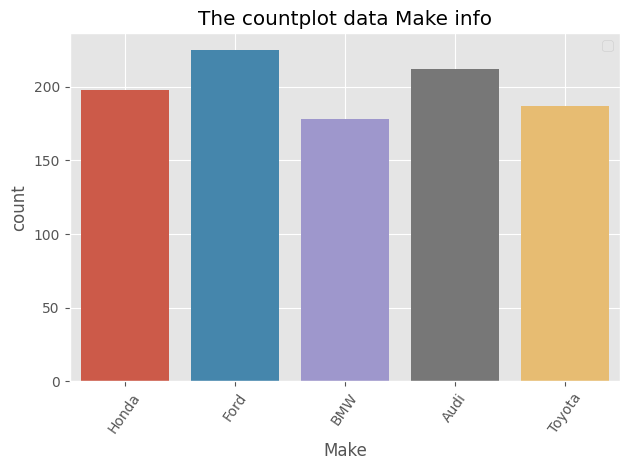

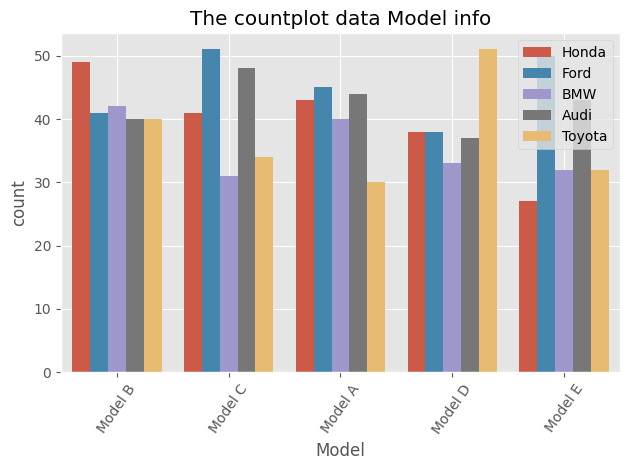

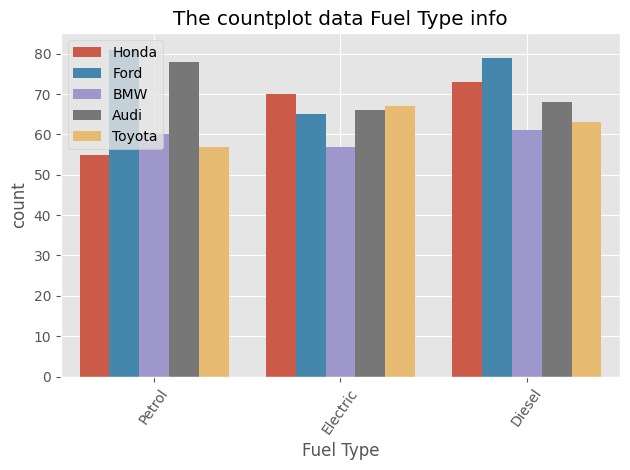

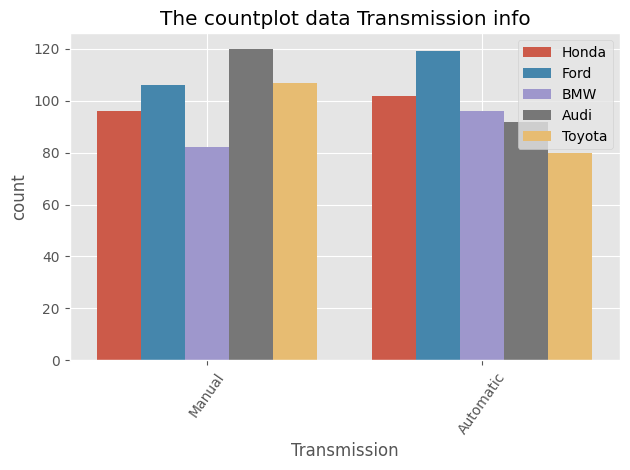

In [17]:
categorical_col = df.select_dtypes(include='object').columns

plt.style.use('ggplot')
for col in categorical_col:
    sns.countplot(x=col, data=df, hue='Make')
    plt.xticks(rotation=55)
    plt.title(f'The countplot data {col} info')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

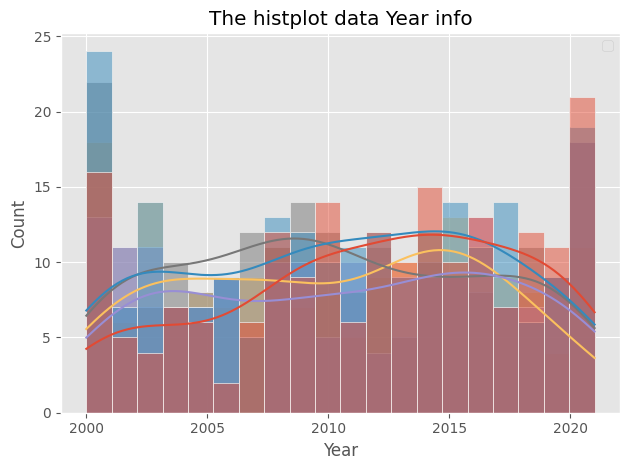

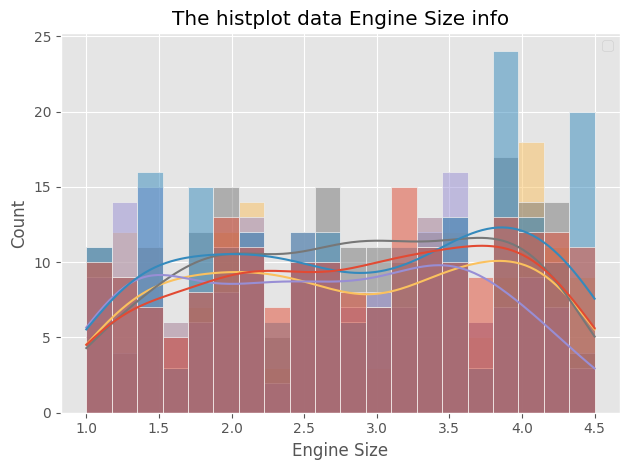

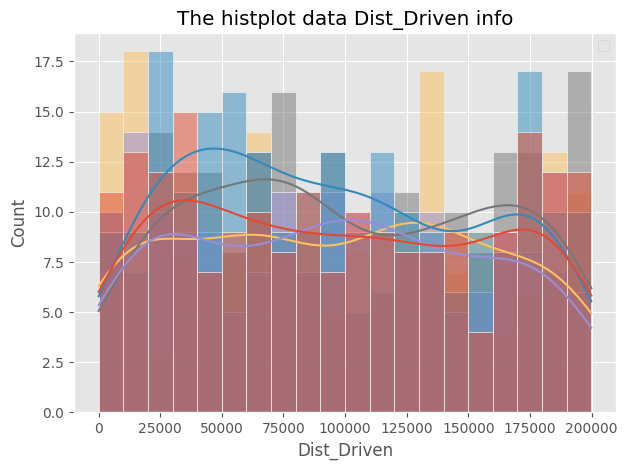

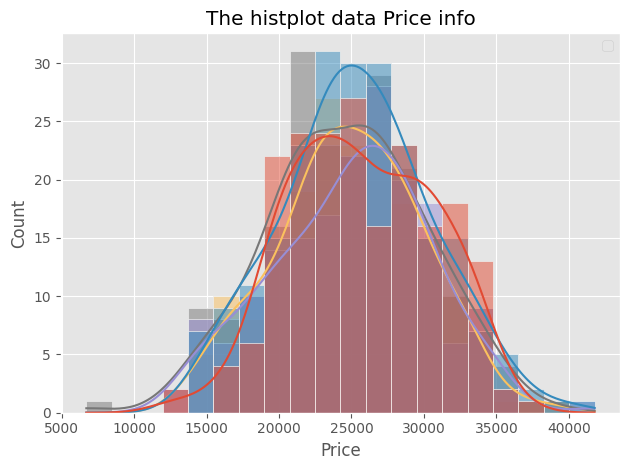

In [18]:
numerical_col = df.select_dtypes(include=np.number).columns

plt.style.use('ggplot')
for col in numerical_col:
    sns.histplot(data=df,x=col,kde=True,bins=20,hue='Make')
    plt.title(f'The histplot data {col} info')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

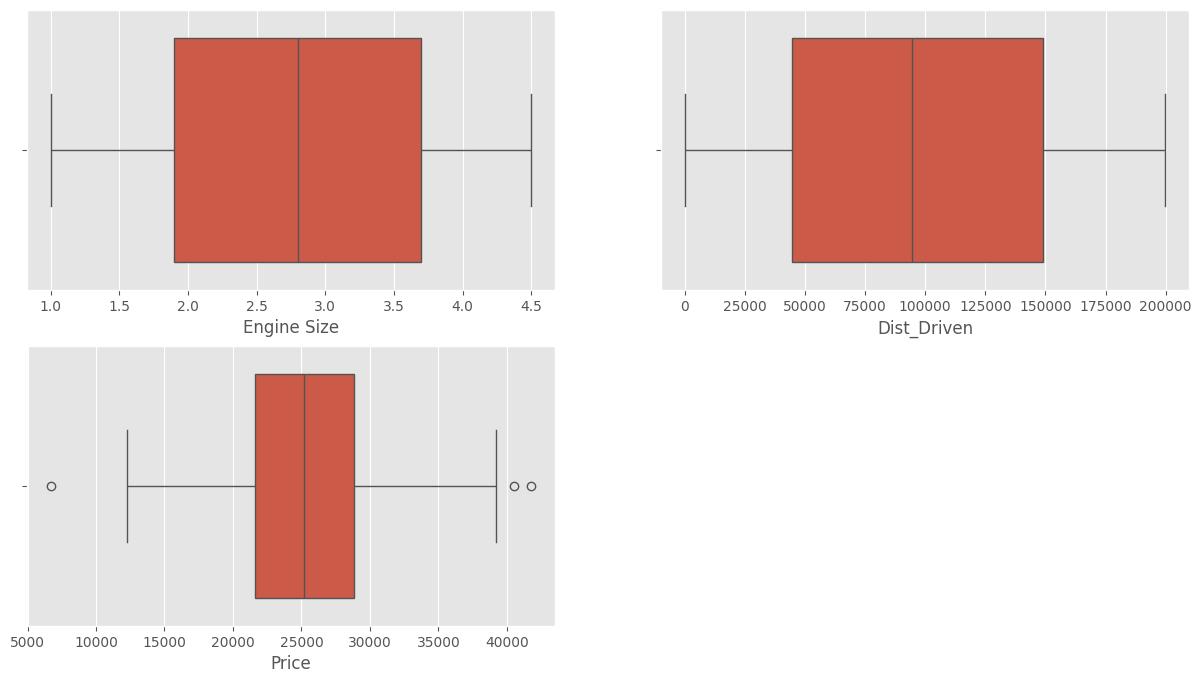

In [19]:
plt.figure(figsize =(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data = df, x ='Engine Size')

plt.subplot(2, 2, 2)
sns.boxplot(data = df, x = 'Dist_Driven')

plt.subplot(2, 2, 3)
sns.boxplot(data = df, x = 'Price')

plt.show()

In [20]:
# Step 1: Outlier detection using IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Remove rows outside the bounds
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print("Shape after removing outliers:", df.shape)

Lower bound: 10760.142462737595, Upper bound: 39634.10488078541
Shape after removing outliers: (997, 8)


In [ ]:
# Q1 = df['Price'].quantile(0.25)
# Q3 = df['Price'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)].copy()

# print(f"Original shape: {df.shape}")
# print(f"Shape after removing outliers: {df_no_outliers.shape}")
# display(df_no_outliers.head())

In [ ]:
# # Removing unnecessary columns

# df_no_outliers.drop('Model',axis = 1, inplace = True)

In [ ]:
# # Creating Dummy Variables for Categorical columns

# make = pd.get_dummies(df_no_outliers.Make, drop_first = True, dtype = int)
# fuel_type = pd.get_dummies(df_no_outliers['Fuel Type'], drop_first = True, dtype = int)
# transmission = pd.get_dummies(df_no_outliers['Transmission'], drop_first = True, dtype = int)

In [ ]:
# df_no_outliers = pd.concat([df_no_outliers, make], axis = 1)
# df_no_outliers = pd.concat([df_no_outliers, fuel_type], axis = 1)
# df_no_outliers = pd.concat([df_no_outliers, transmission], axis = 1)

In [ ]:
# df_no_outliers.drop(['Make', 'Fuel Type', 'Transmission'],axis = 1, inplace = True)

In [ ]:
# df_no_outliers.head()

## Train-Test Split

### Splitting Features & Target

In [21]:
X = df.drop(columns=['Price'])  # All features
y = df['Price']                 # Target variable

### Encode Categorical Features

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ['Make', 'Model', 'Fuel Type', 'Transmission']

# # "remainder='passthrough'" means keep the other columns as they are
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ],
#     remainder='passthrough'
# )

In [22]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Size', 'Dist_Driven', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')

In [23]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Size,float64
Dist_Driven,int64
Fuel Type,object
Transmission,object
Price,float64


In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Column lists
categorical_features = ['Make', 'Model', 'Fuel Type', 'Transmission']
numerical_features = ['Year', 'Engine Size', 'Dist_Driven']

# Final preprocessor (both categorical + numerical)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # keep other columns as they are
)


### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training (Regression Models)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Models dictionary
models = {
    "Linear Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    "Decision Tree": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    "Ridge Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=1.0))
    ]),
    "Lasso Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.1))
    ])
}

In [27]:
# Store results
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append
    results.append([name, r2, mae, rmse])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])



In [28]:
results_df

,Model,R² Score,MAE,RMSE
0,Linear Regression,0.841825,1751.834533,2164.398367
1,Decision Tree,0.675422,2531.494201,3100.476782
2,Random Forest,0.808376,1935.384327,2382.283145
3,Ridge Regression,0.841866,1751.412754,2164.118923
4,Lasso Regression,0.841843,1751.746595,2164.277660


In [29]:
best_model_name = results_df.sort_values(by="R² Score", ascending=False).iloc[0]["Model"]
print("Best model:", best_model_name)

Best model: Ridge Regression


In [30]:
# Final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model', 'Fuel Type',
                                                   'Transmission']),
                                                 ('num', StandardScaler(),
                                                  ['Year', 'Engine Size',
                                                   'Dist_Driven'])])),
                ('regressor', LinearRegression())])

In [31]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(final_pipeline, f)

print("✅ Model saved as best_model.pkl")

✅ Model saved as best_model.pkl


In [32]:
from google.colab import files
files.download("best_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np
# import pandas as pd

# # Models with parameter grids
# model_params = {
#     "Linear Regression": {
#         "model": LinearRegression(),
#         "params": {}  # LinearRegression ke liye koi major hyperparameter nahi hota
#     },
#     "Decision Tree": {
#         "model": DecisionTreeRegressor(random_state=42),
#         "params": {
#             "regressor__max_depth": [None, 5, 10, 20],
#             "regressor__min_samples_split": [2, 5, 10]
#         }
#     },
#     "Random Forest": {
#         "model": RandomForestRegressor(random_state=42),
#         "params": {
#             "regressor__n_estimators": [50, 100, 200],
#             "regressor__max_depth": [None, 5, 10],
#             "regressor__min_samples_split": [2, 5, 10]
#         }
#     },
#     "Ridge Regression": {
#         "model": Ridge(),
#         "params": {
#             "regressor__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
#         }
#     },
#     "Lasso Regression": {
#         "model": Lasso(),
#         "params": {
#             "regressor__alpha": [0.01, 0.1, 1.0, 10.0]
#         }
#     }
# }

In [ ]:
# results = []

# # Loop through models
# for name, mp in model_params.items():
#     # Pipeline
#     pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('regressor', mp["model"])
#     ])

#     # GridSearchCV
#     grid = GridSearchCV(pipe, mp["params"], cv=5, scoring='r2', n_jobs=-1)
#     grid.fit(X_train, y_train)

#     # Predict
#     y_pred = grid.predict(X_test)

#     # Metrics
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#     # Store results
#     results.append([
#         name,
#         r2,
#         mae,
#         rmse,
#         grid.best_params_
#     ])

# # DataFrame
# results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE", "Best Params"])

In [ ]:
# results_df